In [243]:
# Initialize Otter
import otter
grader = otter.Notebook("hw9.ipynb")

# Homework 9: Predictive Modelling and Model Comparision

Name: Luke Hermann and James Pieper

Student ID: 485879 and 486594

Collaborators:


## Instructions

This is the final homework/Project, which is about Understanding Data Profiling, Feature Engineering, Feature Selection, Model Comparision & Selection as a _final project_ for our 217a class.

We will be using the techniques and approaches introduced throughout the course focusing mainly towards the second half of the semester:

* [M0] Python for DS
* [M1] The DS and ML Workflows
* [M2] Exploratory Data Analsyis
* [M3] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M4] Linear Regression (if applicable - depends on problem/dataset)**
* **[M5] Linear Classification (if applicable - depends on problem/dataset)**
* [M6] Learning Principles and Ethical Thinking for DS
* **[M7] Clustering K-Means (if applicable - depends on problem/dataset)** 
* **[M8] Similarity-based Learning K-NN (if applicable - depends on problem/dataset)**
* **[M9] More Models (Decision Tree, Random Forest, Neural Network) for Feature Engineering & Model Comparision & Selection**
* **[Lecture Discussion session] Creating & Managing Model pipeline for ML workflow**

The main focus of this project is majorly on the last modules [M4]-[M10]. In particular, it will be helpful to review **Lab 4 & hw4 onwards for more clarification**.
Most of the things you will do in this final project are explained in `Lab9-1 and Lab9-2` and `Final Lecture Discussion session with Demo`. Then, review the other labs and hws to recap the general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [244]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our final project this semester, we'll take a look at data for California Housing Price Prediction
https://www.kaggle.com/subashdump/california-housing-price-prediction/data 


As you have seen throughout the semseter we have learned various techniques to solve a problem task (Classification, Regression, Clustering etc.) starting from problem formulation to EDA to model building to model evaluation and performing feaure engineering and selection in order to improve the model's performance.
You will be combining all the knowledge learned so far in this final project. You will be making assuptions and decisions on your own with appropriate justifications in writeups about how to improve the prediction model using all the tools and techniques learned so far and provide the best model at the end.


The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Our goal will be to use this dataset to gain some insight about characteristics of different features.
We will be using data profiling from pandas and create models (hopefully more than 3) and complare them to find out which model performed the best and probably explain why it is the best model among all in this data.


<!-- BEGIN QUESTION -->

### Problem 1.1

Download the data and load it in this notebook for further processing and analysis.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take? what kind of relationship you would explore in this dataset and on what features? 
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [245]:
# BEGIN SOLUTION

import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# reading the CSV file
data = pd.read_csv('./utility/data/housing.csv')
 
# displaying the column names of the data
print(f'Column names: {data.columns}')

# displaying data points and features
print(f'\nData points: {data.shape[0]} \nFeatures: {data.shape[1]}')

# END SOLUTION

Column names: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Data points: 20640 
Features: 10


**Description:** The data being used comes from a dataset in [kaggle](#https://www.kaggle.com/subashdump/california-housing-price-prediction/data) and was obtained via the website and read using pandas. It is a sample dataset for Calfornia housing statistics relating to the respective prices of the houses. There are a total of 20,640 data points and 10 features. Such features include: housing_median_age, total_rooms, population, median_house_value, etc. These features can take values from integers and floats to strings.

### Problem 1.2
### Getting Familiar with the Data

Install the pandas data profile dependencies and import them to generate the data report using __df.profile_report__. 
Hint - Follow the Lecture9Demo for example.


**Write-up!** What is the domain of this dataset and what kind of prediction (regression, classification or clustering) we are doing with this dataset and why? Describe the additional insights (if any) you get from generating the pandas data profile report, which you did not observe in the previous step. Does it change your and thinking process or provide any ideas about data pre-processing or processing steps? 

<a id='rep'></a>

In [246]:
# BEGIN SOLUTION

import pandas_profiling

# Generate data report
pr = data.profile_report()
pr

# END SOLUTION

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Description:** The domain of of the dataset is the housing market (specifically in California). The kind of prediction being done is regression because we're using training data input to create model to predict an output (median house price). The report gives a lot of insight as explained below, however, some of the interesting parts include the "Missing cells", the "Variable types" and the "Correlation" sections. Each of these will be addressed during the pre-processing step and fixed accordingly.

### Problem 1.3: Data Description and Pre-processing

**Write-up!** What are the major highlights and interesting points in the report generated in the previous cell (or your own EDA process). 
Describe your insights and thought process regarding those interested aspects of the data/features/graph/statistics in terms of general relationship among features such as correlation, interaction, cardinality, distribution, missing data etc.


**Description:** The pandas report provided a significant amount of insight into the data set that we're working with, and even indicated which features may be of interest due to their high correlation with other variables. For instance, we noticed that "median_income is highly correlated with median_house_value," indicating that this is a feature worth looking into (as seen in 3.4). There are several correlations that the report makes note of that make logical sense, such as population being highly correlated with total rooms and number of rooms being highly correlated with number of bedrooms. These are fairly obvious correlations so we won't give much notice to them later, especially since we are only concerned with housing prices.

Outside of relationships, the report contained other important notes about the data set; we were told that there were 207 missing cells, which will help us with our processing of the data before we begin with model training. In addition, the report also showed that there was one categorical variable (among 9 other numeric variables), which is ocean_proximity. This feature may be worth looking into later so it will be important to using encoding to convert each categorical value to a numeric value.

In [247]:
# Look for null values within dataset
print(f'Check for null values: \n{data.isnull().sum()}')

Check for null values: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [248]:
# BEGIN SOLUTION

from sklearn.preprocessing import LabelEncoder

# Temporarily remove rows with NA before FE (Feature Engineering)
non_fe_data = data.dropna()

# Make sure there are no NA values
print(f'Check for null values: \n{non_fe_data.isnull().sum()}')

# Encode the categorical data
labelEncoder = LabelEncoder()
data["ocean_proximity"] = labelEncoder.fit_transform(data["ocean_proximity"])
non_fe_data["ocean_proximity"] = labelEncoder.fit_transform(non_fe_data["ocean_proximity"])
data["ocean_proximity"].value_counts()

# END SOLUTION

Check for null values: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

<a id='drop'></a>

In [249]:
# Calculate the non-null average value for the total_bedrooms columns
total_bedrooms_vals = data[data["total_bedrooms"].notnull()]["total_bedrooms"]
mean_bed_vals = total_bedrooms_vals.mean()

# Replace the null values with the average values
data['total_bedrooms'] = data['total_bedrooms'].fillna(mean_bed_vals)

# Make sure there are no NA values
print(f'Check for null values: \n{data.isnull().sum()}')

Check for null values: 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Problem 1.4: Split the Data (you will be using the same data split (train-validation-test) for all the models in the following questions )

Extract input (X) and output (y) data from the dataset. 

Use the train and test split and k-fold cross validation (use 5 fold cross validation) from the scikit learn library to split the data into 80% training and 20% testing.

**NOTE** Remember that you will be using the same cross validation and train test splits values for all the predictive modeling part (Problem 3) for the fair comparision at the end. 

**NOTE** We are **not** doing any feature engineering yet here, just making a baseline model to compare to!

In [250]:
# BEGIN SOLUTION

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Make y the median_house_value column and X everything else
X, y = data.drop('median_house_value', axis=1), data['median_house_value']
temp_X, temp_y = non_fe_data.drop('median_house_value', axis=1), non_fe_data['median_house_value']

# New X for later feature selection
lin_X = data['median_income']

# new train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, test_size=0.2)

# New train-test split for feature selection
lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(lin_X, y, test_size=0.2)

# Reshape to fit later
lin_X_train = lin_X_train.to_numpy().reshape(-1, 1)
lin_X_test = lin_X_test.to_numpy().reshape(-1, 1)

# Create the Kfolds
kf = KFold(n_splits=5, shuffle=True)

# END SOLUTION

### Problem 1.5: Perform Linear Regression

Let's create a baseline model here:

Perform Linear Regression on training data. Predict the output for the test dataset using the fitted model. Print the root mean squared error (RMSE) from Linear Regression for test data set. Note that we are still **not** doing any feature engineering yet!



In [251]:
# BEGIN SOLUTION

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

# NOTE: the temp versions of the train test are used as to not use the feature engineering version
# Perform Linear Regression steps
model = LinearRegression()
model.fit(temp_X_train, temp_y_train)
y_pred = model.predict(temp_X_test)

# Calculate the RMSE without cross validation
rmse = np.sqrt(mean_squared_error(temp_y_test, y_pred))

# Calculate the RMSE with cross validation
scores = cross_val_score(model, temp_X, temp_y, scoring='neg_mean_squared_error',
                         cv=kf, n_jobs=-1)

# Calculate R^2 for later comparison
r_squared = r2_score(temp_y_test, y_pred)

# view RMSE and R^2
print(f'RMSE using Kfolds: {sqrt(mean(absolute(scores)))}')
print(f'RMSE without Kfolds: {rmse}')
print(f'R^2 value: {r_squared}')

# END SOLUTION

RMSE using Kfolds: 69660.34068742837
RMSE without Kfolds: 70045.64622832574
R^2 value: 0.63351979318802


## 2. Feature Engineering

### Problem 2.1 

Identify features which needs feature engineering after looking at the baseline model's result. Perform Feature Tranformation/Manipulation/Engineering in this step and use this knowledge in predictive modeling part. 

Apply some feature generation technices in order to make those features more useful for the data such as checking the datatypes, handling missing values, extracting new features from existing ones, encoding some features if categorical, scaling, standardization etc. 

**Write up!** Explain your reasoning for selecting features and performing those specific feature engineering steps respectively.

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

**Explanation:** After looking at the data report, we determined there were values (specifcally 207) that were listed as NA that needed to be removed. To deal with the issue, we took the average of the column in which the values were located and replaced the NA values with the calculated average. This was [done in step 1.3](#drop) because the train test split used for the .fit sections in the latter half required non-null values. Another step done in the same section was the encoding of the ocean_proximity variable, as it was originally categorical so we used sklean's LabelEncoder to resolve the issue. Finally, we standardized the data below in section 2.3 because the difference in units could cause for unwanted predictions.


### Problem 2.2: Perform Basic Feature Manupilation & Data Transformation

1. Be consistent with the feature engineering process in train and test data. No data snooping.
2. Handle Missing data: Fill the missing values with the mean of the respective column.
3. Encode categorical data: Convert categorical column in the dataset to numerical data.
4. Standardize data: Standardize training and test datasets.

### Problem 2.3: Perform Feature Engineering (Feature Selection or/and Feature Generation) including but not limited to statistical, ML based, Newly extracted/created features etc. wherever appropriate/applicable in the respective Predictive Modeling part.


<a id='std'></a>

In [252]:
# BEGIN SOLUTION

from sklearn import preprocessing

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
lin_scaler = preprocessing.StandardScaler().fit(lin_X_train)

# Apply the transformation to both the training and the test set
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

lin_X_train = lin_scaler.transform(lin_X_train)  
lin_X_test = lin_scaler.transform(lin_X_test)

# END SOLUTION

## 3. Predictive Modeling [Using scikit learn pipeline is highly encouraged]

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

Remember to use cross-validation and all of our other best practices from HW8, Lab 8 and Lab 9!

### Problem 3.1 : Perform K-Nearest Neighbors Regression

Perform K-Nearest Neighbors Algorithm for Regression on the training data.

Predict output for the test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from K-Nearest Neighbors Regression on the test datset.

In [253]:
# BEGIN SOLUTION

from sklearn.neighbors import KNeighborsRegressor

# This loop checks multiple n's and returns the
# best R^2 along with the current n
high = 0
curr_n = 0
for i in range(1,50):
    # Perform steps for KNN Regression
    knn_model = KNeighborsRegressor(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    temp = r2_score(y_test, knn_y_pred)
    # Check the R^2 score
    if temp > high:
        curr_n = i
        high = temp

print(f'Best n: {curr_n}')
print(f'R^2 value: {high}')

# END SOLUTION

Best n: 9
R^2 value: 0.7276040092326267


### Problem 3.2 : Perform Decision Tree Regression 
Perform Decision Tree Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from Decision Tree Regression on the test dataset.

In [254]:
# BEGIN SOLUTION

from sklearn.tree import DecisionTreeRegressor

dtr_score = 0
curr_d = 0
for i in range(1,50):
    # Perform steps for KNN Regression
    dtr_model = DecisionTreeRegressor(max_depth = i)
    dtr_model.fit(X_train, y_train)
    dtr_y_pred = dtr_model.predict(X_test)
    temp = r2_score(y_test, dtr_y_pred)
    # Check the R^2 score
    if temp > dtr_score:
        curr_d = i
        dtr_score = temp

print(f'Best depth: {curr_d}')
print(f'R^2 value: {dtr_score}')

# END SOLUTION

Best depth: 9
R^2 value: 0.7232472618633234


### Problem 3.3 : Perform Random Forest Regression :
Perform Random Forest Regression on the training data.

Predict the output for test dataset using the fitted model.

Print root mean squared error (RMSE) or R^2 (Use either one but be consistent for all the models) from Random Forest Regression on the test dataset.

In [255]:
# BEGIN SOLUTION

from sklearn.ensemble import RandomForestRegressor

# Perform steps for Random Forest Regression
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
rfr_y_pred = rfr_model.predict(X_test)
rfr_score = r2_score(y_test, rfr_y_pred)

print(f'R^2 value: {rfr_score}')

# END SOLUTION

R^2 value: 0.8120230127824756


### Problem 3.4: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

Compare the results of the baseline model with this model's result.

In [256]:
# BEGIN SOLUTION

# Perform steps for Linear Regression
# Note: This uses the previously created X_train and X_test for one IV
lr_model = LinearRegression()
lr_model.fit(lin_X_train, lin_y_train)
lr_y_pred = lr_model.predict(lin_X_test)
lr_score = r2_score(lin_y_test, lr_y_pred)

print(f'R^2 value: {lr_score}')

# END SOLUTION

R^2 value: 0.46953091116839263


**Comparison:** The results of this model were worse when compared to that of the baseline model. Reasoning for this can be found in the [4.2 write-up description.](#desc)

## 4. Model Comparision

### Problem 4.1:

Compare all the models results and report the lowest accuracy score.

Visualize all the final models error analysis (RMSE) or R^2 (Use either one but be consistent for all the models) in a bar graph.

<a id='bar'></a>

Lowest R^2 (Linear Regression with 1 IV): 0.46953091116839263


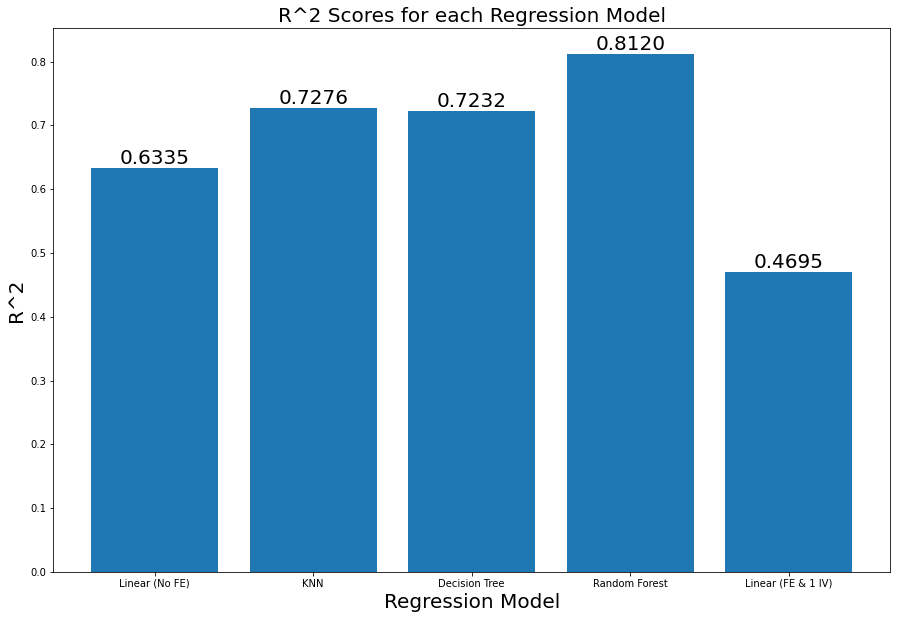

In [257]:
# BEGIN SOLUTION

%matplotlib inline

import matplotlib.pyplot as plt
from decimal import Decimal

# Create a list with the model labels
modelLabel = ['Linear (No FE)', 'KNN', 'Decision Tree', 'Random Forest', 'Linear (FE & 1 IV)']

# Create a list with the R^2 scores
r_squared_scores = [r_squared, high, dtr_score, rfr_score, lr_score]

# Round the scores for cleaner plot
for i in range(5):
    r_squared_scores[i] = Decimal(r_squared_scores[i])
    r_squared_scores[i] = round(r_squared_scores[i], 4)

# Plot with appropriate labels
plt.figure(figsize=(15, 10))
plt.bar(modelLabel, r_squared_scores)
plt.xlabel('Regression Model', fontsize=20)
plt.ylabel('R^2', fontsize=20)
plt.title('R^2 Scores for each Regression Model', fontsize=20)

# Show the scores above  the bars
for i in range(5):
    plt.text(i, r_squared_scores[i], r_squared_scores[i], ha='center', va='bottom', fontsize='20')

print(f'Lowest R^2 (Linear Regression with 1 IV): {lr_score}')

# END SOLUTION

### Problem 4.2:

Now review the feature enginnering lab (lab 9-1 and lab 9-2) and apply one of the feature selection and/or one feature generation method and use it for prediction on the test data. Evaluate and compare the all the models (LR, DT, RF, K-NN) on original features (no feature engineering) with the ones on the engineered features.
Then, select the best model after the whole comparision.

**Write up** Explain which feature selection and/or one feature generation method have you selected and why for this dataset.

**Explanation:** We decided to use model-based feature selection using random forests. In Lab 9-1 we learned that MB feature selection accounts for interactions between features, which we took notice of in the [pandas report](#rep). Given that several features had interactions between them, we decided it would be best to use this method in order to select the most important features with a RF mask.

In [258]:
# BEGIN SOLUTION

# Perform model-based feature selection
importance = None
mask = None
 
new_rf_model = RandomForestRegressor()
new_rf_model.fit(X_train,y_train)
importance = new_rf_model.feature_importances_
mask = importance > np.median(importance)

X_train_selected = X_train[:,mask]
X_test_selected = X_test[:,mask]
print(f'     All Features: {X_train.shape}')
print(f'Selected Features: {X_train_selected.shape}')

# END SOLUTION

     All Features: (16512, 9)
Selected Features: (16512, 4)


<a id='featureSelect'></a>

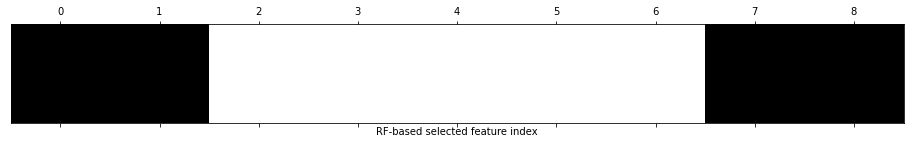

In [259]:
# Show the selected features
plt.matshow(new_rf_mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("RF-based selected feature index")
plt.yticks(())
plt.show()

In [260]:
# Perform random forest regression steps with new X_train
new_rf_model.fit(X_train_selected, y_train)
new_rf_y_pred = new_rf_model.predict(X_test_selected)
new_rf_score = r2_score(y_test, new_rf_y_pred)

print(f'R^2 value: {new_rf_score}')

R^2 value: 0.8259216696853864


<a id='newBar'></a>

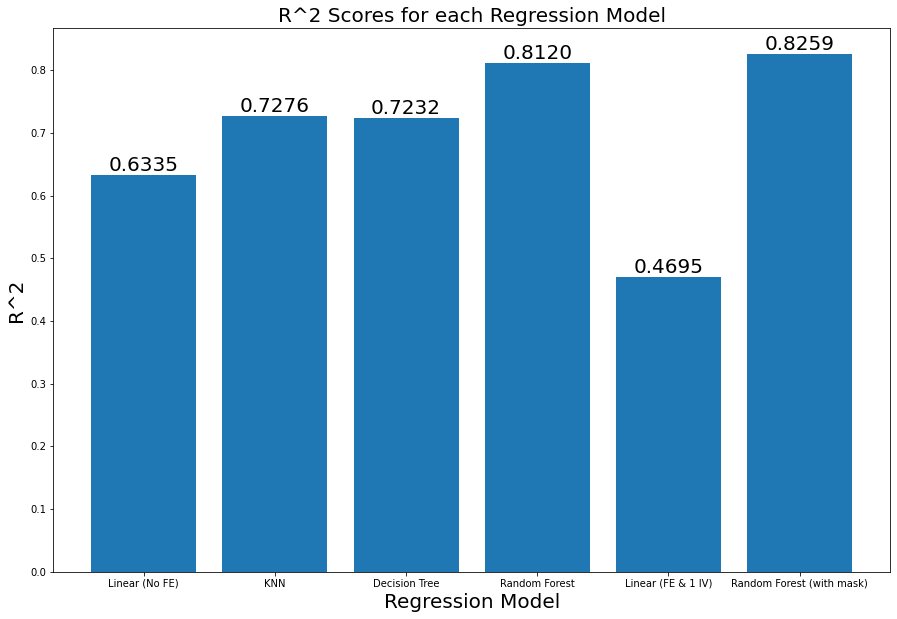

In [261]:
%matplotlib inline

import matplotlib.pyplot as plt
from decimal import Decimal

# Create a list with the model labels
new_modelLabel = ['Linear (No FE)', 'KNN', 'Decision Tree', 'Random Forest', 'Linear (FE & 1 IV)', 'Random Forest (with mask)']

# Create a list with the R^2 scores
new_r_squared_scores = [r_squared, high, dtr_score, rfr_score, lr_score, new_rf_score]

# Round the scores for cleaner plot
for i in range(6):
    new_r_squared_scores[i] = Decimal(new_r_squared_scores[i])
    new_r_squared_scores[i] = round(new_r_squared_scores[i], 4)

# Plot with appropriate labels
plt.figure(figsize=(15, 10))
plt.bar(new_modelLabel, new_r_squared_scores)
plt.xlabel('Regression Model', fontsize=20)
plt.ylabel('R^2', fontsize=20)
plt.title('R^2 Scores for each Regression Model', fontsize=20)

# Show the scores above  the bars
for i in range(6):
    plt.text(i, new_r_squared_scores[i], new_r_squared_scores[i], ha='center', va='bottom', fontsize='20')

<a id='desc'></a>


**Write up** Summarize your results and provide some crucial insights about the entire with and without feature engineering process such as which model performed the best and why, based on what metrics and indicators, etc. Which feature engireeing step provided more value to the predictive modeling process?


**Summarization:** We used R^2 values as our metric for evaluating the accuracy of each regression model and found that the Random Forest regression model appeared to be the most accurate. The (linear) regression model before feature engineering processes had an R^2 score of 0.6335, but post-engineering models (KNN, Decision-tree, Forest) appeared to perform better with the exception of our Linear Regression model (post FE) . This value was surprisingly low (0.4695), so we figured that this was due to either incorrect data manipulation, mistake in the feature engineering, etc., but the other models were performing so well with the same engineered data set (median_income column only though). We believe that the reason for this may be attributed to the fact that only one feature was used for regression, and when talking about what factors determine the price of a house, there are usually several, not just one. While the median income may have positive correlation (which it does, shown by our positive R^2 value and the [pandas report](#rep)), a model trained with other factors will likely be better to use in predicting housing prices.

For instance, we trained a model using feature selection on the data set with a random forest mask,so we selected only the features that were determined most important to then perform regression on. In addition to median_income, the 3 other important [features](#featureSelect) were ocean_proximity and location (i.e. longitude/latitude). The model performed its best here when only the important features were used, giving an R^2 value of 0.8259. This result makes sense, as throwing out the less important features to then create a model for prediction ends with a higher accuracy.

While [replacing null values with averages](#drop) and [standardizing our data](#std) was helpful, as shown by an increase in accuracy of feature engineered models, it appears that feature selection with a mask provided the most value to the predictive modeling process.

In [262]:
# BEGIN SOLUTION

# NOTE: Given cell is usused although we weren't sure if it could be deleted

# END SOLUTION

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

Note that Otter is not being used for this assignment, but is still configured for Gradescope purposes.

In [263]:
grader.check("hw9")

hw9 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [264]:
grader.check_all()

hw9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [265]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)